In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread("sudoku.tif", 0)
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
img = cv2.equalizeHist(img)

rows, cols = img.shape

In [8]:
def crop_topLeft():
    for i in range(rows):
        for j in range(cols):
            if img[i, j] != 255:
                return i, j


In [9]:
def crop_bottomRight():
    for i in range(rows - 1, 0, -1):
        for j in range(cols - 1, 0, -1):
            if img[i, j] != 255:
                return i, j

In [10]:
x1, y1 = crop_topLeft()
x2, y2 = crop_bottomRight()

sudoku = img[x1:x2, y1:y2]
width, height = sudoku.shape

In [11]:
def save(sudoku):
    rows, cols = sudoku.shape
    partOfRows = rows // 10
    partOfCols = cols // 10
    
    for i in range(partOfRows, rows-partOfRows):
        for j in range(partOfCols, cols-partOfCols):
            target = np.average(sudoku[:,:])
            if target<255:
                cv2.imwrite(f'Output/part_{i*j}',target)

-1

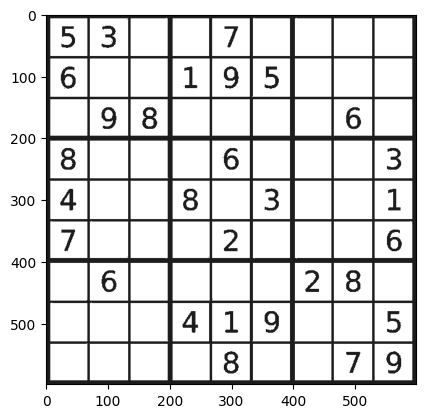

In [12]:
plt.imshow(sudoku, cmap='gray')
cv2.waitKey()